**Laboratory Lecture 10**

This lecture will be focused on machine learning algorithms.
With this purpose, we will use one of the most common libraries, which is [scikit-learn](https://scikit-learn.org/stable/). It can be installed in your Python environment as follows.

pip install scikit-learn


In [ ]:
!pip install scikit-learn

scikit-learn provides a few standard datasets, that do not require to download any file from some external website.

The complete list is available at this [link](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In this lecture, for instance, we will use the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) for classification. The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

Let's load the dataset now and apply some functions in order to better understand the kind of data.

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
digits_data = datasets.load_digits()
print(digits_data.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


You can check the dimensionality: 1797 as samples total and 64 as dimensionality (8x8 images of digits)

In [ ]:
print(digits_data.data.shape)

(1797, 64)


We can check the number of classes. In this cases, the numbers between 0 and 9.

In [ ]:
print(np.unique(digits_data.target))
print(digits_data.target.shape)

[0 1 2 3 4 5 6 7 8 9]
(1797,)


Since the digits dataset contains images, we can also graphically display the samples.

<Figure size 640x480 with 0 Axes>

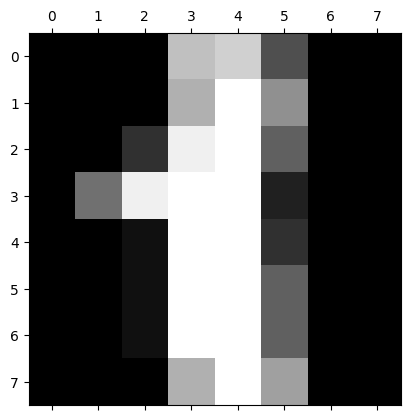

In [ ]:
plt.gray()
plt.matshow(digits_data.images[1])
plt.show()

What number is it? Let's discover the label. We can check the corresponding label by verify the target.
Check the documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [ ]:
print(digits_data.target[1])

1


We can also visualize other samples to get confidence with the datasets:

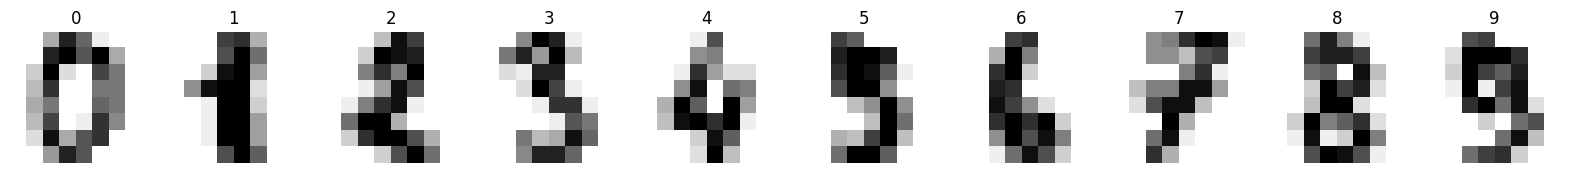

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits_data.images, digits_data.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % label)

In this lecture, for instance, we explore the [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) (SVM) in scikit-learn.

SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

For example, we create a SVM classifier based on SVC with gamma=0.001, while the other parameters have the default value.

In [ ]:
from sklearn import svm
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

We are going to train a SVM on the digits dataset.

Before passing the data, we need to:
* flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,)
* Split the dataset in training and test parts.

In [5]:
# flatten the images
n_samples = len(digits_data.images)
data = digits_data.images.reshape((n_samples, -1))
print(n_samples)
print(data)

1797
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


To split the datasets in the training and the test parts, we can use the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
For instance, the training set corresponds to the 75% of the whole dataset, while the test set to 25%.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 75% train and 25% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits_data.target, test_size=0.25, shuffle=False
)

Let's fit the SVM that we defined before on the trainining set. To do that, we can use [fit](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit):

In [ ]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

SVC(gamma=0.001)

The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset. To do that, we can use [predict](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict):

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

For instance, we can visualize one of the sample in the test set and see the predicted class.

<Figure size 640x480 with 0 Axes>

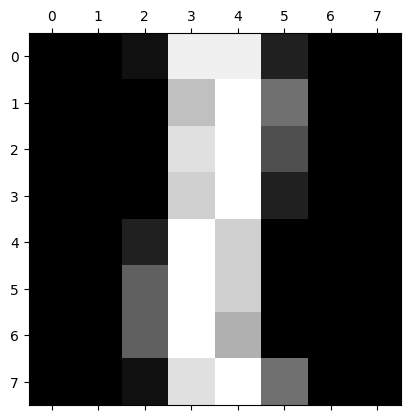

1


In [ ]:
# Select an id
id = 10

# Show the image
plt.gray()
plt.matshow(X_test[id].reshape(8,8))
plt.show()

# Print the prediction
print(predicted[id])

As you can see, it is a challenging task: after all, the images are of poor resolution. Do you agree with the classifier?

We can display other samples similarly how we did before:

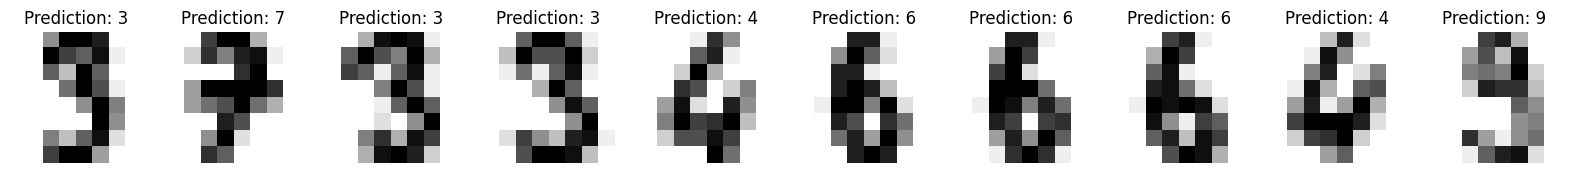

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Typically, it is interesting to quantitively measure the performance of the model. In the case of classification, we can use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that builds a text report showing the main classification metrics.

In [6]:
from sklearn import metrics
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

NameError: name 'clf' is not defined

We can also plot a confusion matrix of the true digit values and the predicted digit values

Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  2  0  1  4  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 40  0]
 [ 0  0  0  1  0  1  0  0  0 43]]


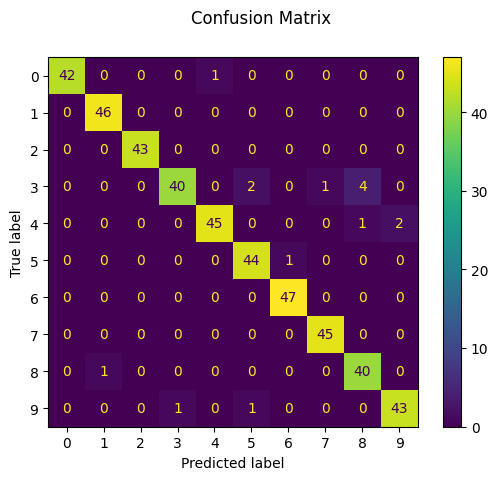

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In the previous example, we fixed a priori the hyperparameters of the model such as γ and C.

However, typically the hyperparameters are set via [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

The simplest way to use cross-validation is to call the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) function on the estimator and the dataset:

In [ ]:
#5-fold cross validation
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, data, digits_data.target, cv=5) # the entire (flatten) dataset
scores

array([0.96388889, 0.91944444, 0.96657382, 0.9637883 , 0.92479109])

The mean score and the standard deviation are hence given by:

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.02
